# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 2 - Interpolacja
### Albert Gierlach

#### Zadanie 1 - Wielomiany interpolujące

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    // used for disabling collapsing big blocks of output ( like 3 charts in row ;) )
    // so chars looks so beautiful
    return false; 
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib as mtplt
from matplotlib import pyplot as plt
from math import cos, pi, sin

mtplt.rcParams['figure.figsize'] = [18, 12] # plots size

In [3]:
def f(x):
    return 1/(1+x**2)


# a coefficients array, x is the point
def poly(x, a):
    y = 0
    for index, val in enumerate(a):
        y += val * (x**index)

    return y

In [4]:
def inter(n):
    print("Podzial na {} wezlow".format(n))
    orig_x = np.linspace(-5, 5, 100)
    orig_draw, = plt.plot(orig_x, [f(x) for x in orig_x], label='f(x)')

    interval = np.linspace(-5, 5, n + 1)
    f_values = [f(x) for x in interval]
    vander = np.vander(interval, increasing=True)
    a = np.linalg.solve(vander, f_values)
    interpol_draw, = plt.plot(orig_x, [poly(x, a) for x in orig_x], label='Interpolated')

    # b) error
    error_draw, = plt.plot(orig_x, [abs(f(x) - poly(x, a)) for x in orig_x], label='Error')
    plt.legend(handles=[orig_draw, interpol_draw, error_draw])
    plt.show()

Podzial na 5 wezlow


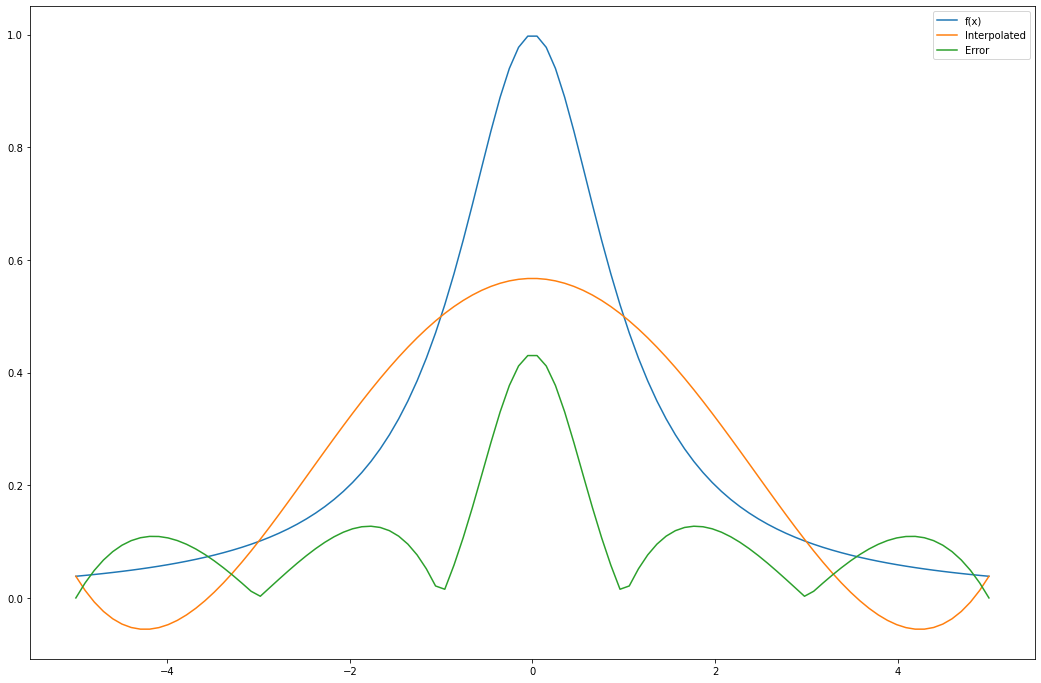

Podzial na 10 wezlow


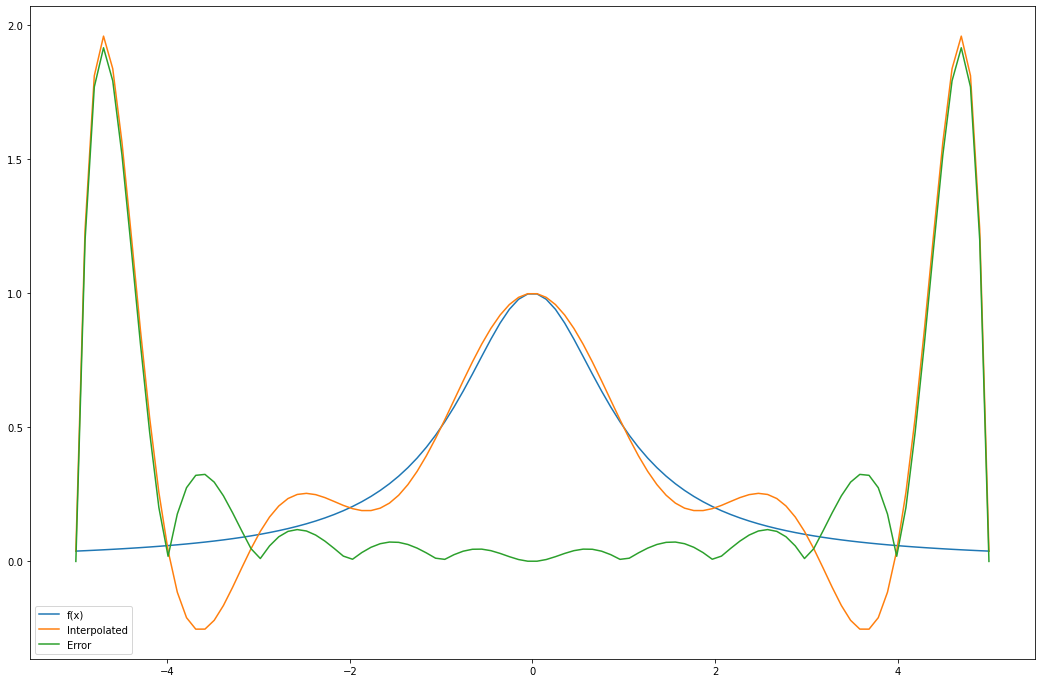

Podzial na 15 wezlow


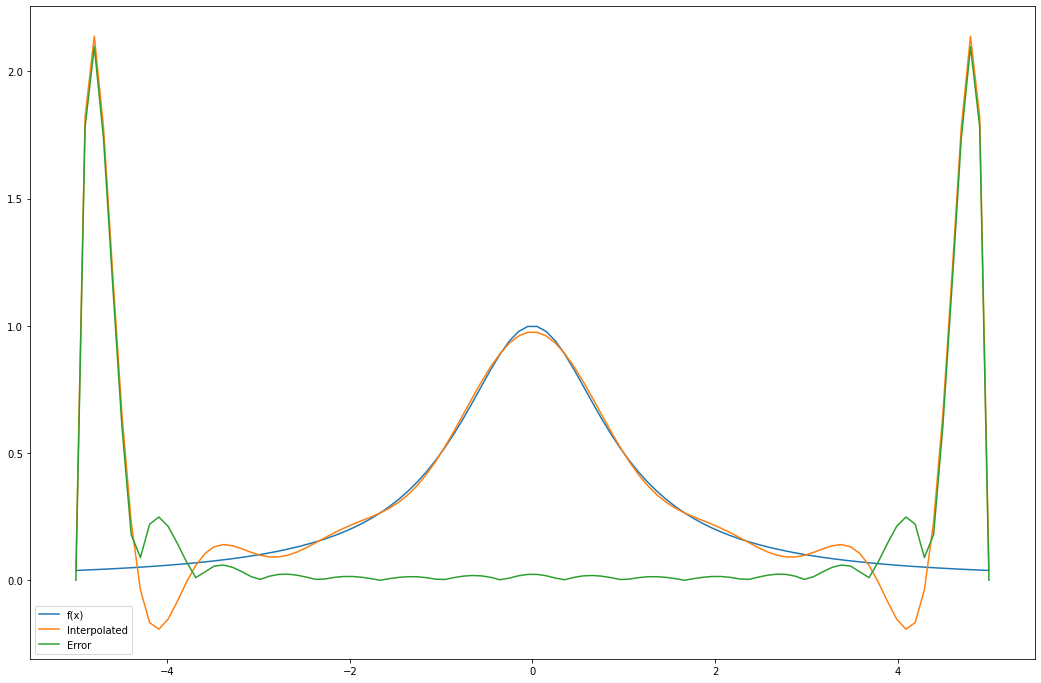

In [5]:
for n in [5, 10, 15]:
    inter(n)

#### Zadanie 2 - Wielomiany interpolujące

In [6]:
def x_k(a, b, k, n):
    return (1/2 * (a + b)) + (1/2 * (b - a)) * cos((((2 * k) - 1) / (2 * n)) * pi)

In [7]:
def inter_2(n):
    a = -5
    b = 5
    print("Podzial na {} wezlow".format(n))
    orig_x = np.linspace(-5, 5, 100)
    orig_draw, = plt.plot(orig_x, [f(x) for x in orig_x], label='f(x)')

    interval = [x_k(a, b, k, n) for k in range(1, n+1)]
    f_values = [f(x) for x in interval]
    vander = np.vander(interval, increasing=True)
    a = np.linalg.solve(vander, f_values)
    interpol_draw, = plt.plot(orig_x, [poly(x, a) for x in orig_x], label='Interpolated')

    # b) error
    error_draw, = plt.plot(orig_x, [abs(f(x) - poly(x, a)) for x in orig_x], label='Error')
    plt.legend(handles=[orig_draw, interpol_draw, error_draw])
    plt.show()

Podzial na 15 wezlow


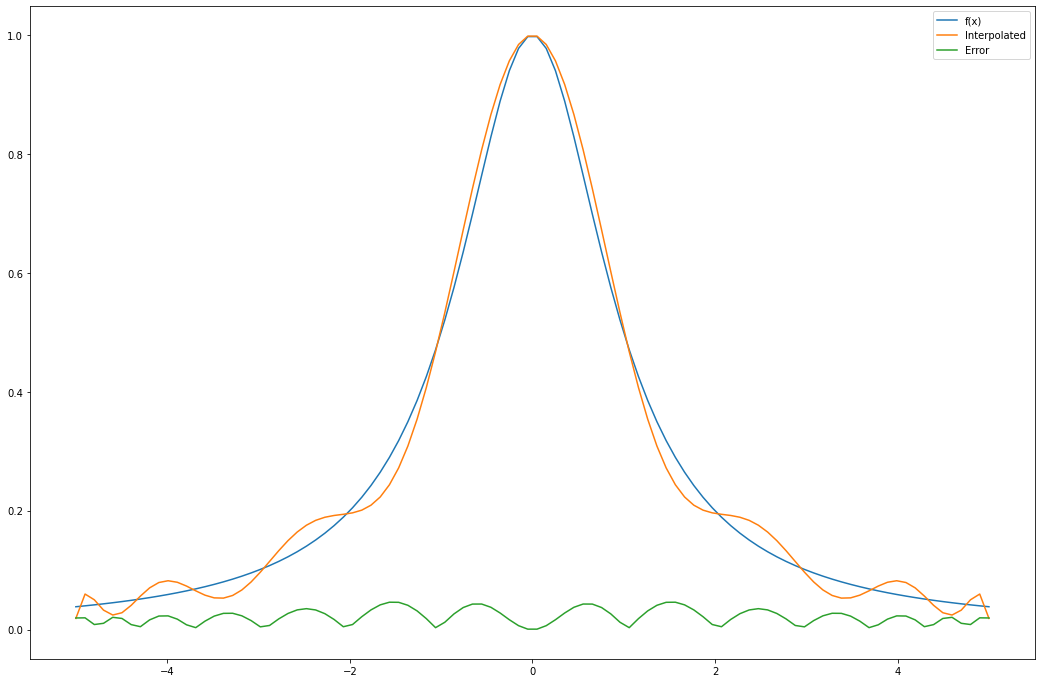

In [8]:
inter_2(15)

#### Zadanie 3 - Interpolacja krzywych funkcjami sklejanymi
##### Algorytm na podstawie książki D. Kincaid'a oraz W. Cheney'a - rodział 9.2 'Natural Cubic Splines'

In [9]:
a = 3
b = 5

# x = a cos(t)
def f_x(t):
    return a * cos(t)

# y = b sin(t)
def f2_x(t):
    return b * sin(t)

def h(i, t):
    return t[i+1] - t[i]

# calculates vector 'z' using gaussian elimination without pivoting
def spline3_coef(n, t, y):
    h = [0] * (n-1)
    b = [0] * (n-1)
    u = [0] * (n-1)
    v = [0] * (n-1)
    z = [0] * n

    for i in range(0, n-1):
        h[i] = t[i+1] - t[i]
        b[i] = (y[i+1] - y[i])/h[i]

    u[1] = 2 * (h[0] + h[1])
    v[1] = 6 * (b[1] - b[0])

    for i in range(2, n-1):
        u[i] = (2 * (h[i] + h[i-1])) - ((h[i-1] ** 2) / u[i-1])
        v[i] = (6 * (b[i] - b[i-1])) - ((h[i-1] * v[i-1])/u[i-1])

    z[n-1] = 0
    # for i in range(n-2, 1, -1): # 3 hours here, plots looks pretty normally, but I knew something was wrong with first interval
    for i in range(n-2, 0, -1):
        z[i] = (v[i] - (h[i] * z[i+1]))/u[i]
    z[0] = 0

    return z

# calculates value of spline at given point - decides which spline to choose 
def spline3_eval(n, t, y, z, x):
    i = 0
    for id in range(n-2, 0, -1):
        if x - t[id] >= 0:
            i = id
            break

    h = t[i+1] - t[i]
    tmp = (z[i] / 2) + ((x - t[i]) * (z[i+1] - z[i]) / (6 * h))
    tmp = -((h/6) * (z[i+1] + (2 * z[i]))) + ((y[i+1] - y[i])/h) + ((x-t[i]) * tmp)
    return y[i] + ((x-t[i]) * tmp)

In [10]:
def draw_plot():
    plt.ylim(top=(max(a,b) + 0.1))      # for readability
    plt.ylim(bottom=-(max(a,b) + 0.1))  # for readability
    plt.show()

# used for drawing whole spline plot
# i - which spline
# z - z vec (see above)
# (t, y) - (argument, value)
# x - for this point we want to calculate spline value
def spline_value(i, z, t, y, x):
    p3 = (z[i+1] / (6 * h(i, t))) * ((x - t[i]) ** 3)
    p2 = (z[i] / (6 * h(i, t))) * ((t[i+1] - x) ** 3)
    p1 = ((y[i+1]/h(i, t)) - ((h(i, t) * z[i+1])/6)) * (x - t[i])
    p0 = ((y[i]/h(i, t)) - ((h(i, t) * z[i])/6)) * (t[i+1] - x)

    return p3 + p2 + p1 + p0


# draw spline plot
# index - spline index
# (xs, ys) - (argument, value)
def draw_spline(index, z, xs, ys):
    den_x = np.linspace(xs[0], xs[len(xs)-1], 200) # smoothing the chart
    spline_values = [spline_value(index, z, xs, ys, x) for x in den_x]
    plt.plot(den_x, spline_values, ls=':')
    

# draws all of splines
def draw_splines(z, t, vals):
    for i in range(0, points - 1):
        draw_spline(i, z, t, vals)
        
        
# draws smooth interpolated func
def draw_interpolated(points, t, values, z):
    plt.plot(t, values, 'o', c='red')  # dots at ends of intervals
    den_x = np.linspace(t[0], t[len(t)-1], 200)         # draw using multiple points (but we use only 10 splines)
    interpolated_x_values = [spline3_eval(points, t, values, z, x) for x in den_x]
    interpolated, = plt.plot(den_x, interpolated_x_values, label='Interpolated', c='black')
    plt.legend(handles=[interpolated])

In [11]:
points = 10                                 # there will be 10 splines
t = np.linspace(0, 2 * pi, points)

x_points = [f_x(x) for x in t]              # sample f(x) 
z_x = spline3_coef(points, t, x_points)     # calc z vec

y_points = [f2_x(x) for x in t]
z_y = spline3_coef(points, t, y_points)

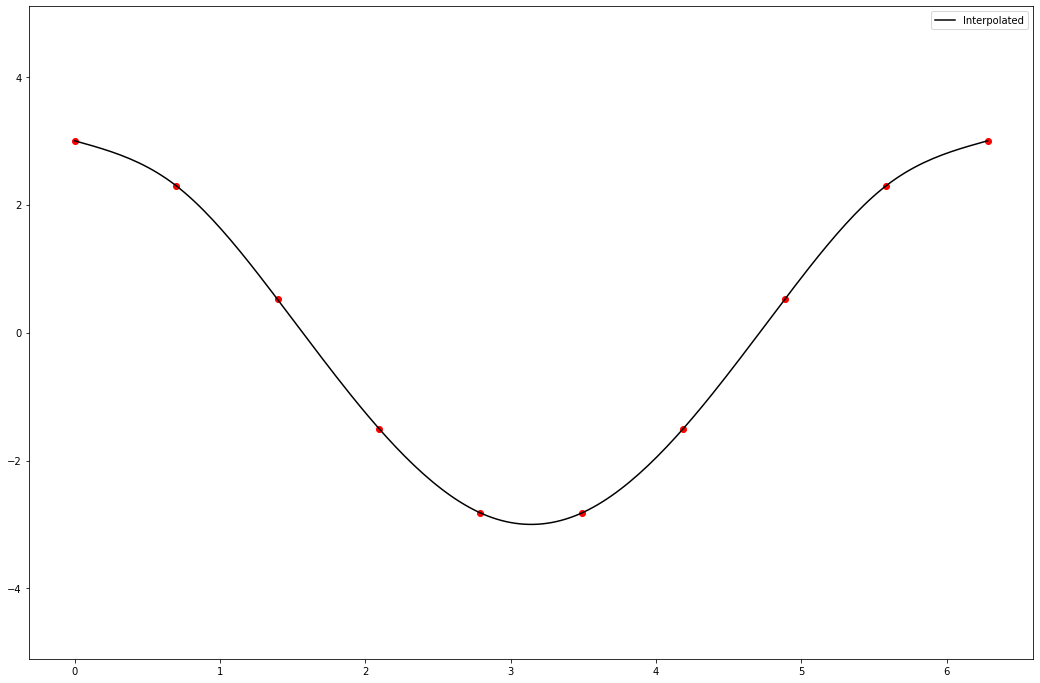

In [12]:
# show result of interpolation
draw_interpolated(points, t, x_points, z_x)
draw_plot()

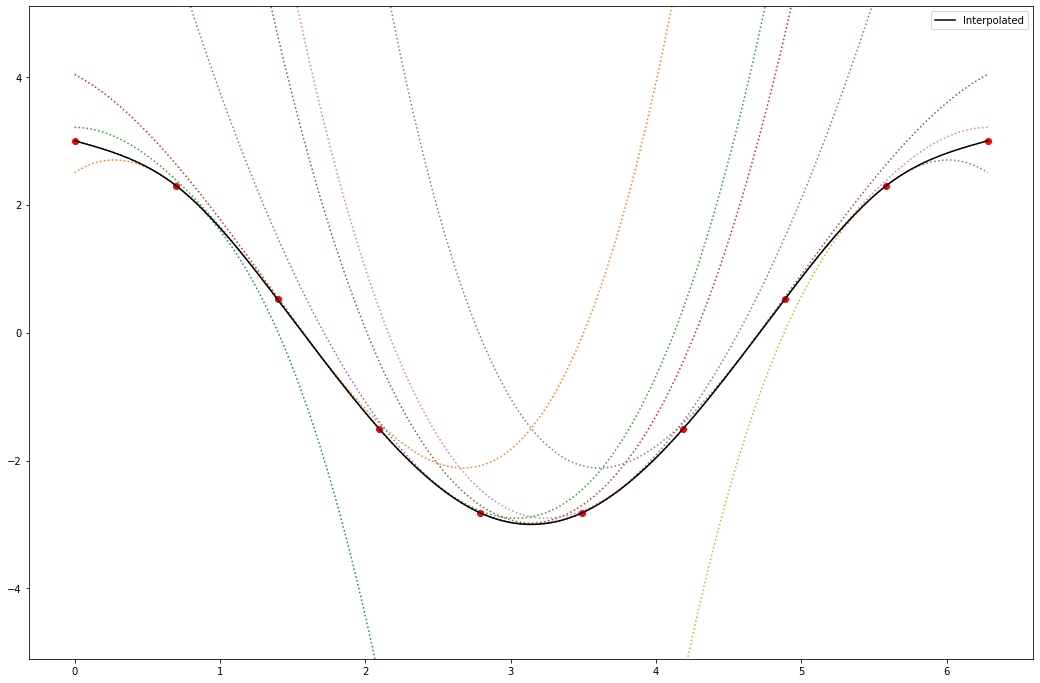

In [13]:
# show result of interpolation + draw all splines
draw_splines(z_x, t, x_points)
draw_interpolated(points, t, x_points, z_x)
draw_plot()

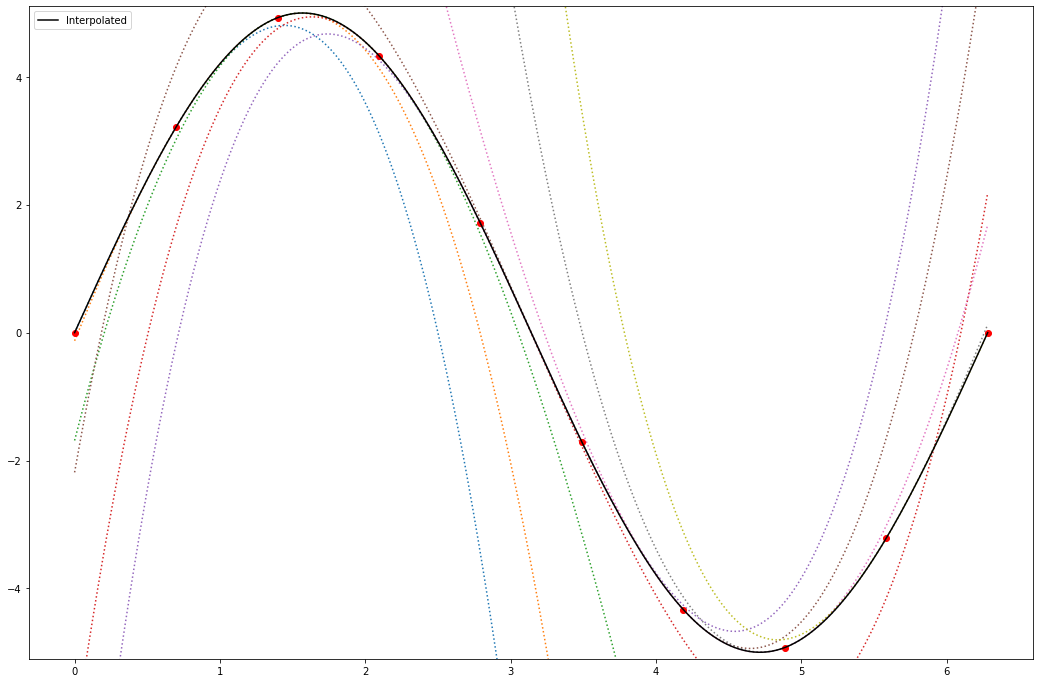

In [14]:
# same for second function
draw_splines(z_y, t, y_points)
draw_interpolated(points, t, y_points, z_y)
draw_plot()

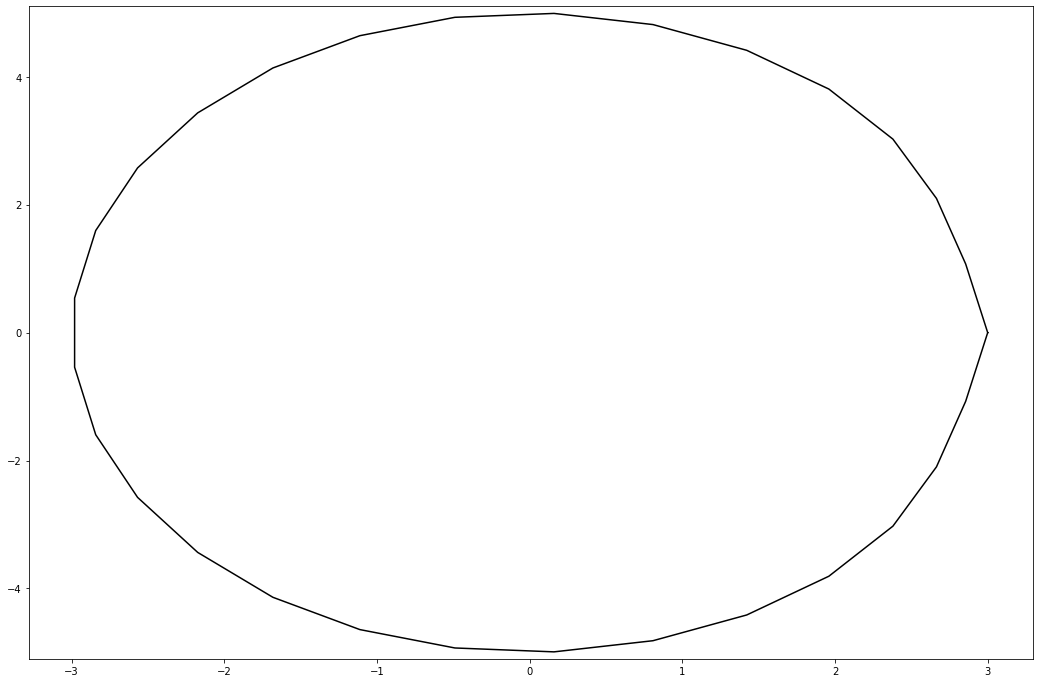

In [15]:
den_x = np.linspace(0, 2 * pi, 30)
interpolated_x_values = [spline3_eval(points, t, x_points, z_x, x) for x in den_x]
interpolated_y_values = [spline3_eval(points, t, y_points, z_y, x) for x in den_x]
plt.plot(interpolated_x_values, interpolated_y_values, c='black')
draw_plot()

#### Warto zauważyć, że skrajny punkt po prawej (3, 0) nie jest tak 'gładki' jak pozostałe złączenia. Może to być spowodowane założeniem warunków brzegowych przy wyliczaniu wektora z (z[0] = 0 oraz z[n-1] = 0)